In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

import numpy as np
import pandas as pd

import mlgrad.af as af
import mlgrad.cluster as cluster
import mlgrad.funcs as funcs

from mlgrad.cluster import KMeans, KMeansMahalanobis, RKMeans
from mlgrad.array_transform import array_modified_zscore
import mlgrad.af as af


(200, 2) (100, 2)


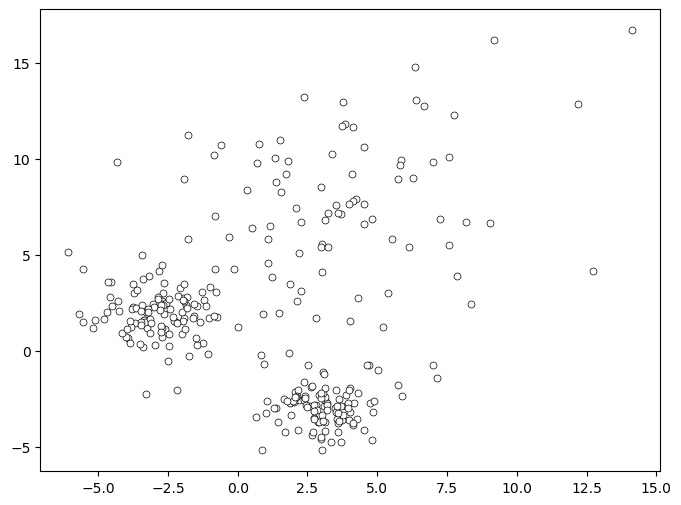

In [2]:
S=10.
X_1, _ = make_blobs(n_samples=200, n_features=2, 
                    centers=[(-30,20), (30,-30)], 
                    cluster_std=[10.0, 10.0])

X_2, _ = make_blobs(n_samples=100, n_features=2, 
                    centers=[(10,40),(50, 90)], 
                    cluster_std=[30., 30.])

print(X_1.shape, X_2.shape)
X = np.vstack([X_1, X_2])
X /= S

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.show()


In [3]:
def get_range(a, q=20):
    amin, amax = min(a), max(a)
    h = (amax - amin) / q
    return amin - h, amax + h

xmin, xmax = get_range(X[:,0])
ymin, ymax = get_range(X[:,1])
XX, YY = np.meshgrid(
            np.linspace(xmin, xmax, 100), 
            np.linspace(ymin, ymax, 100))
XY = np.c_[(XX.ravel(), YY.ravel())]

In [4]:
km = KMeans(2)
km.fit(X)

In [5]:
Yp = km.predict(X)

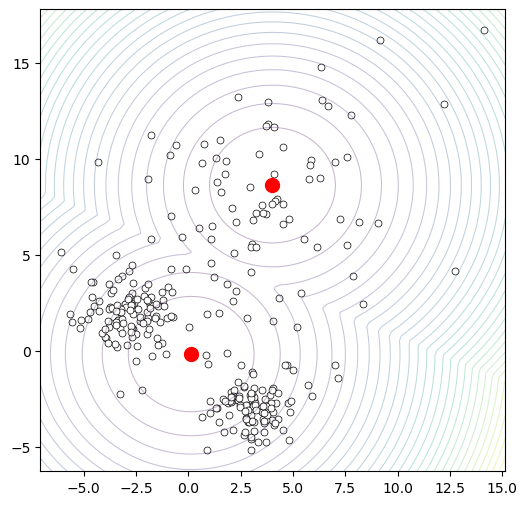

In [6]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(km.c[:,0], km.c[:,1], c='r', s=100)

Z = km.eval_dists(XY)
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

plt.show()

In [7]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.66, 0.001))
rkm = cluster.RKMeans(2, wma)
rkm.fit(X)

In [8]:
Y2p = rkm.predict(X)

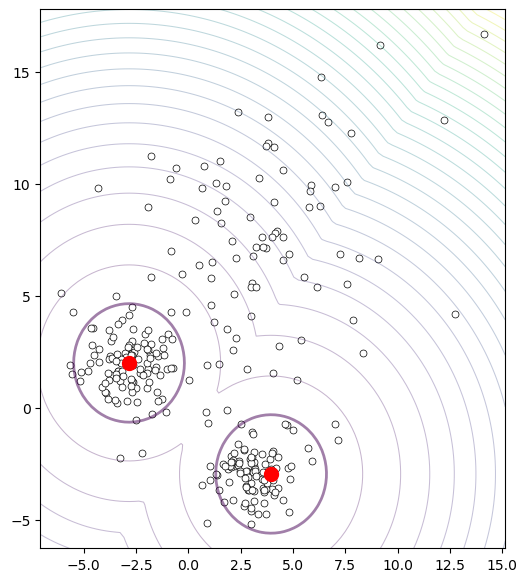

In [9]:
plt.figure(figsize=(6,7))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(rkm.c[:,0], rkm.c[:,1], c='r', s=100)

Z = rkm.eval_dists(XY)
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

zz = np.quantile(rkm.eval_dists(X), 0.66)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, alpha=0.5)

plt.show()

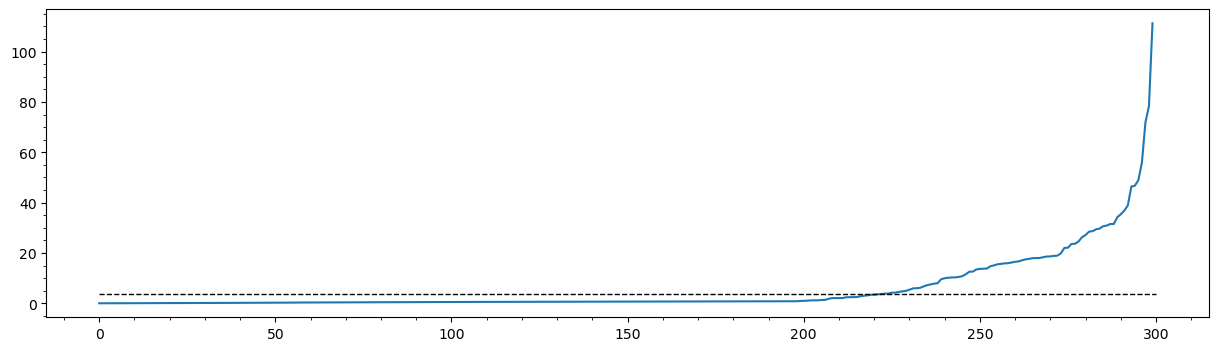

In [10]:
zs = array_modified_zscore(rkm.eval_dists(X))
plt.figure(figsize=(15,4))
plt.plot(sorted(abs(zs)))
plt.hlines(3.5, 0, len(zs), color='k', linestyle='--', linewidth=1.0)
plt.minorticks_on()
plt.show()

In [11]:
wma = af.averaging_function("WM", funcs.Quantile_Sqrt(0.66, 0.001))
rkm = cluster.RKMeansMahalanobis(2, wma)
rkm.fit(X)

In [12]:
Y2p = rkm.predict(X)

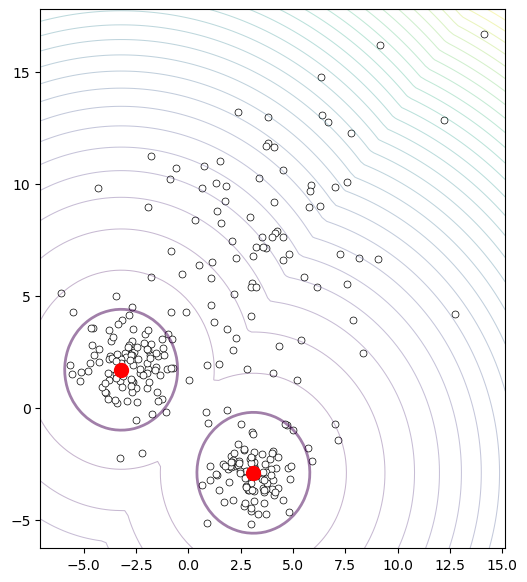

In [13]:
plt.figure(figsize=(6,7))
plt.scatter(X[:,0], X[:,1], s=25, c='w', edgecolors='k', linewidth=0.5)
plt.scatter(rkm.c[:,0], rkm.c[:,1], c='r', s=100)

Z = rkm.eval_dists(XY)
ZZ = Z.reshape(XX.shape)
plt.contour(ZZ, levels=np.linspace(Z.min(), Z.max(), 30), extent=(xmin,xmax,ymin,ymax), linewidths=0.75, alpha=0.3)

zz = np.quantile(rkm.eval_dists(X), 0.66)
plt.contour(ZZ, levels=[zz], extent=(xmin,xmax,ymin,ymax), linewidths=2, alpha=0.5)

plt.show()

In [ ]:
zs = array_modified_zscore(rkm.eval_dists(X))
plt.figure(figsize=(15,4))
plt.plot(sorted(abs(zs)))
plt.hlines(3.5, 0, len(zs), color='k', linestyle='--', linewidth=1.0)
plt.minorticks_on()
plt.show()